In [34]:
import pandas as pd
import os
import json
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import networkx as nx
from tqdm import tqdm
import datetime
import pytz

In [2]:
data_dir = "C:/Users/Ali/Desktop/nftnft/data/ProcessedData"

In [11]:
def build_auction_df():
    list_auctions_files = os.listdir(f"{data_dir}/AuctionData")
    
    list_transactions = []
    list_nfts = []
    
    for auction_file in tqdm(list_auctions_files):
        result_json = {}
        f = open(f'{data_dir}/AuctionData/{auction_file}')
        auction_raw_json = json.load(f)['data']['nft']
        
        try:
            f = open(f'{data_dir}/NFT-pages/{auction_file}')
            nft_pages_json = json.load(f)['props']['pageProps']['artwork']
        except:
            continue
        
        result_json = nft_pages_json
        result_json['creator'] = auction_raw_json['creator']['id']
        result_json['owner'] = auction_raw_json['ownedOrListedBy']['id']
        result_json['transfer_count'] = 0
        result_json['unlist_count'] = 0
        result_json['auctions_started'] = 0
        result_json['auctions_ended'] = 0
        
        raw_auction_histories = auction_raw_json['nftHistory']
        
        result_auction = []
        for raw_auction_history in reversed(raw_auction_histories):
            result = {}

            result['event'] = raw_auction_history['event']
            
            if result['event'] == 'Settled':
                result_json['auctions_ended'] += 1
            elif result['event'] == 'Listed':
                result_json['auctions_started'] = result_json['auctions_ended'] + 1
            elif result['event'] == 'Transferred':
                result_json['transfer_count'] += 1
            elif result['event'] == 'Unlisted':
                result_json['unlist_count'] += 1
            
            
            result['actor'] = raw_auction_history['actorAccount']['id']
            if raw_auction_history['nftRecipient']:
                result['recipient'] = raw_auction_history['nftRecipient']['id']
                
            if raw_auction_history['amountInETH']:
                result['amount'] = float(raw_auction_history['amountInETH'])
                result_json['price'] = result['amount']
            else:
                result['amount'] = raw_auction_history['amountInETH']
            
            result['date'] = datetime.datetime.fromtimestamp(int(raw_auction_history['date']))
            result['id'] = raw_auction_history['id']
            result_auction.append(result)
            list_transactions.append(result)
            
        result_json['history'] = result_auction
        
        list_nfts.append(result_json)

        
    return(pd.DataFrame(list_nfts), pd.DataFrame(list_transactions))
    
    
    
df_nft, df_transactions = build_auction_df()

100%|██████████████████████████████████████████████████████████████████████████| 64469/64469 [00:23<00:00, 2789.36it/s]


In [13]:
df_nft.head()

,id,name,description,assetIPFSPath,metadataIPFSPath,width,height,duration,mimeType,mintTxHash,...,latestTxDate,assetVersion,creator,owner,transfer_count,unlist_count,auctions_started,auctions_ended,history,price
0,34937030-6ab5-42ad-b9bf-b76e9a2799bc,Ancient Future,"Here at the nexus of infinity, we inscribe our...",QmXRmfvvenqr4eJ62vjxvYqc5eWp6i2MjpkTh9VZcLiuTi...,QmcsepfMDFh2udUQWtvcnZeARNFFCPA1n2WRWUH1ysWv4W...,2100.0,1574.0,11.370667,video/mp4,None,...,2021-07-19T18:40:55,2,0xcf0949bf6d2adf8032260fd08039c879cf71c128,0xa9468e128edf50bb2a5b8aa88565ec2a0cc3816b,1,0,0,0,"[{'event': 'Minted', 'actor': '0xcf0949bf6d2ad...",NaN
1,b30a19f0-31cd-48ac-9eda-8b12cb3c8895,Active Gestures 2,1000 x 1000px Animated GIF 2021\n\nCreated usi...,QmPVKvii6r11uRCfRGQai2mjoXto5mD51yyaVHZenZMuUB...,QmZW6SKmTxoXXPgRfLisxD84uUgQx7urAgEiP6mgVyuefj...,1000.0,1000.0,4.000000,video/mp4,None,...,2021-07-01T22:12:37,2,0x47edbd307180556dbbeb5beabd8a40ac30520f57,0xf3b406f0e3a47a3d2801d5d669fbbdbee8098f0f,1,0,1,1,"[{'event': 'Minted', 'actor': '0x47edbd3071805...",0.7500
2,21f0071b-e93f-440d-a6ff-7c2319b05b71,stone push study #1,"experiment with organic forms\n\n1964 × 1976, ...",QmXRXAt5tumUrt8QwXPFNM5ph8Jo9RJGxi96qG7BSof6iD...,QmSdiuvPj6B3cT5Wj9tcx94ytTKjX4KhBpZ5o71PwH6VbA...,636.0,640.0,44.066666,video/mp4,None,...,2021-02-09T10:20:59,2,0xe00712086490734ef8b4d72839a7237e505767f5,0xf598aadf12a2fc4709b5db0c4c169715efaf2038,0,0,1,1,"[{'event': 'Minted', 'actor': '0xe007120864907...",1.0000
3,3c420f1e-5828-4f9e-9d86-73130bc03fa3,Human After All,The robots leave the earth before the human do...,QmYXe6tuEKoMEN4ZZ11z8BE9Zoub78ns7UVhK8794arbaQ...,QmVQcbUNxs3qV991rwAcpJp6mTFFvRV9JcJnEvZNy5Vzvh...,1200.0,1200.0,11.666667,video/mp4,None,...,2021-02-26T09:09:12,2,0x8f750434af719e00400c5ac83a3265b27ffc3087,0xc68a79ce1d9f0d7972e941711b798069d72527ce,0,0,1,1,"[{'event': 'Minted', 'actor': '0x8f750434af719...",0.8801
4,60eb93b2-1ccc-40f8-a2da-81f1712cb37a,- Guttersnipe -,"Writing, and the form of the words themselves,...",QmRxfoTBLcQYXiRVU9PWmFY3D5mk7jzjabjsGnYFrLKq37...,Qmc3JRwYAkb8n4AQqvNSzxf9bJjt97VgGt4c1y3yyhNGJz...,1080.0,1080.0,11.833333,video/mp4,0xa48c1990e2e428e4d0ff9300f972ff3415f0d1a3b2cb...,...,2021-03-19T03:39:53,2,0x502630c2ea7e77423b7fe187d6644011389150ab,0x502630c2ea7e77423b7fe187d6644011389150ab,0,0,1,0,"[{'event': 'Minted', 'actor': '0x502630c2ea7e7...",0.1001


In [14]:
df_transactions.head()

,event,actor,recipient,amount,date,id
0,Minted,0xcf0949bf6d2adf8032260fd08039c879cf71c128,0xcf0949bf6d2adf8032260fd08039c879cf71c128,NaN,2021-01-20 16:09:54,0xaffde820c8f8f07885c46d2be368dcd7f1929b98e2cf...
1,Transferred,0xcf0949bf6d2adf8032260fd08039c879cf71c128,0xa9468e128edf50bb2a5b8aa88565ec2a0cc3816b,NaN,2021-07-19 14:40:55,0xe9073196d453356ac1875f3bdc67eb850c151dad1e9c...
2,Minted,0x47edbd307180556dbbeb5beabd8a40ac30520f57,0x47edbd307180556dbbeb5beabd8a40ac30520f57,NaN,2021-01-22 18:46:05,0x1a4fce2c0005d71c0f587cffb0bebb34fc1761b814af...
3,Listed,0x47edbd307180556dbbeb5beabd8a40ac30520f57,NaN,0.75,2021-01-22 18:50:00,0x6a6197343e84f61bb63ccc86ce804168be7a56987b7b...
4,Bid,0xda3c325ab45b30aeb476b026fe6a777443ca04f3,NaN,0.75,2021-02-19 14:37:39,0x32e31c19e47bbd76f1e9f50001fb37e0e81c0ae9096e...


In [15]:
def create_account_df():
    list_account_files = os.listdir(f"{data_dir}/AllAccounts/User_Info_Json")
    
    list_accounts = []
    
    for account_file in tqdm(list_account_files):
        result_json = {}
        f = open(f'{data_dir}/AllAccounts/User_Info_Json/{account_file}')
        account_raw_json = json.load(f)['props']['pageProps']
        result_json = account_raw_json
        if account_raw_json['user']['acceptedInvite']:
            result_json['inviter'] = account_raw_json['user']['acceptedInvite']['senderPublicKey']
            result_json['invite_date'] = account_raw_json['user']['acceptedInvite']['redeemedAt'] 
        else:
            result_json['inviter'] = None
            result_json['invite_date'] = None 
        
        result_json['collectors'] = account_raw_json['collectors']
        
        
        list_accounts.append(result_json)
    
    return pd.DataFrame(list_accounts)
df_accounts = create_account_df() 


100%|███████████████████████████████████████████████████████████████████████████| 24679/24679 [03:08<00:00, 130.97it/s]


In [16]:
df_acc = df_accounts.set_index('username')

In [17]:
df_nft[df_nft['creator'] == '0x29665Bf6F59f4c0A04d53cCFb45e543d9E142e24'.lower()]['history']

17668    [{'event': 'Minted', 'actor': '0x29665bf6f59f4...
19653    [{'event': 'Minted', 'actor': '0x29665bf6f59f4...
Name: history, dtype: object

<font size="5"><b>Invitation Letter Price</b></font>

In [18]:
list_buy_inviters = []
for index, row in tqdm(df_acc.dropna().iterrows()):
    inviter = row['inviter']
    receiver = index
    
    result = {'inviter' : inviter, 'receiver' : receiver, 'price': None, 'art_name': None}
    try:
        for collector in df_acc.loc[inviter.lower()]['collectors']:
            if collector['publicKey'].lower() == receiver:
                for nft_history in df_nft[df_nft['creator'] == inviter.lower()]['history']:
                    for transaction in reversed(nft_history):

                        if transaction['event'] == 'Bid' and transaction['actor'] == receiver.lower():
                            result['price'] = transaction['amount']
                    
                            list_buy_inviters.append(result)
                            break

    except:
        continue
    
display(pd.DataFrame(list_buy_inviters))

17972it [00:10, 1712.62it/s]


,inviter,receiver,price,art_name
0,0x29665Bf6F59f4c0A04d53cCFb45e543d9E142e24,0x00a3d79edfb7c6429ca56773f96e3116a3fa472b,0.2000,None
1,0x3E140deF0b11Da7C96d15ca8C0fc8E4f0FB0EC3c,0x00cea64ec48f7ca0e0013f0e2bdeed16d6d0dafc,0.8000,None
2,0x5c6978DeC3AC19E21b5246A2f7EF5c60f532BE01,0x00d49a506150efc5d3baf2720f2570c91dafe8ed,0.1000,None
3,0x75cbb2c387d16e4C0e6dcF9e0F12cd3BA4bb7FF3,0x016ddf75de1a5ea06a4c2f57fac156f9ab43ec12,0.1000,None
4,0xaDAEc0Cd15A5af621C5BD4687063ffe8f4a803aC,0x0189e46e746fa64a20fd11420d5ec05cdd1ed01e,0.4200,None
...,...,...,...,...
1083,0xd5F751A996Ab50FaEF6bf3B9C63e4b17142Be186,0xfea1f357b453c9cd89b893b07baa6abfe8536ca2,0.3000,None
1084,0x844c696FCb91aD1095Deac4B8CcA0dA78e8F61E3,0xfeed2eab7fc2c43d06f55ecd5ef5db5f2fe77935,0.8349,None
1085,0xdb6C87768D7Af07017e651De52C7BbE7c817c9eB,0xffc089a940b071cc87dd5d2f0fa2701194ee780e,0.1100,None
1086,0x24Bbc8a80Fbc165F658ABd8529E6441Aae89a337,0xffdbaf56397960d3010229801ba873a689fee06a,0.1400,None


In [19]:
df_list_buy_inviters = pd.DataFrame(list_buy_inviters)

([<matplotlib.axis.XTick at 0x16f728a3880>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

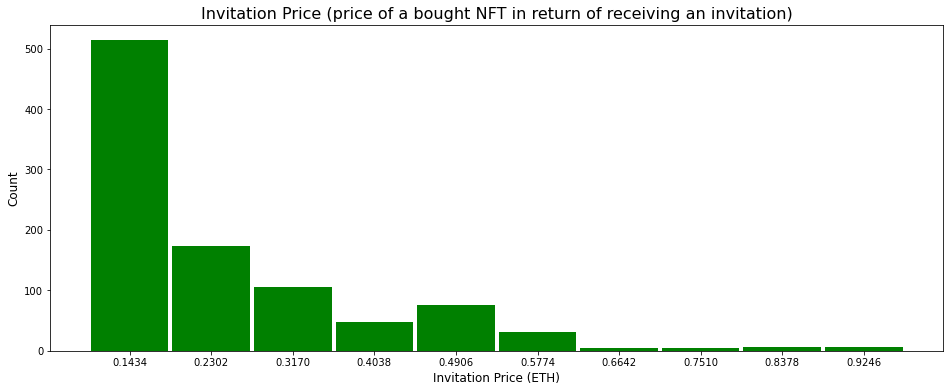

In [20]:
fig = plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(df_list_buy_inviters[df_list_buy_inviters['price']<1]['price'], rwidth=0.95, bins=10, color="green")
plt.xlabel('Invitation Price (ETH)', size=12)
plt.ylabel('Count', size=12)
plt.title("Invitation Price (price of a bought NFT in return of receiving an invitation)", size=16)
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks)

In [21]:
print(len(df_nft[df_nft['transfer_count'] > 0])/len(df_nft)*100, "Transfer percentage")
print("-----")
print(len(df_nft[df_nft['auctions_started'] > 1])/len(df_nft)*100, "Second Auction Started")
print(len(df_nft[df_nft['auctions_started'] > 1])/len(df_nft[df_nft['auctions_ended'] == 1])*100, "Second Auction Started from NFTS that sold on the first")
print(len(df_nft[df_nft['auctions_ended'] > 1])/len(df_nft)*100, "Second Auction Ended")
print("-----")

print(len(df_nft[df_nft['auctions_ended'] >= 1])/len(df_nft[df_nft['auctions_started'] == 1])*100, "First Auction Succes Rate")
print(len(df_nft[df_nft['auctions_ended'] > 1])/len(df_nft[df_nft['auctions_started'] > 1])*100, "Second Auction Succes Rate")

4.990430033889972 Transfer percentage
-----
5.160757871077631 Second Auction Started
15.720780957475261 Second Auction Started from NFTS that sold on the first
0.20544697887583627 Second Auction Ended
-----
36.102634962672965 First Auction Succes Rate
3.980945899965975 Second Auction Succes Rate


<font size="5"><b>Bid Count</b></font>

No handles with labels found to put in legend.


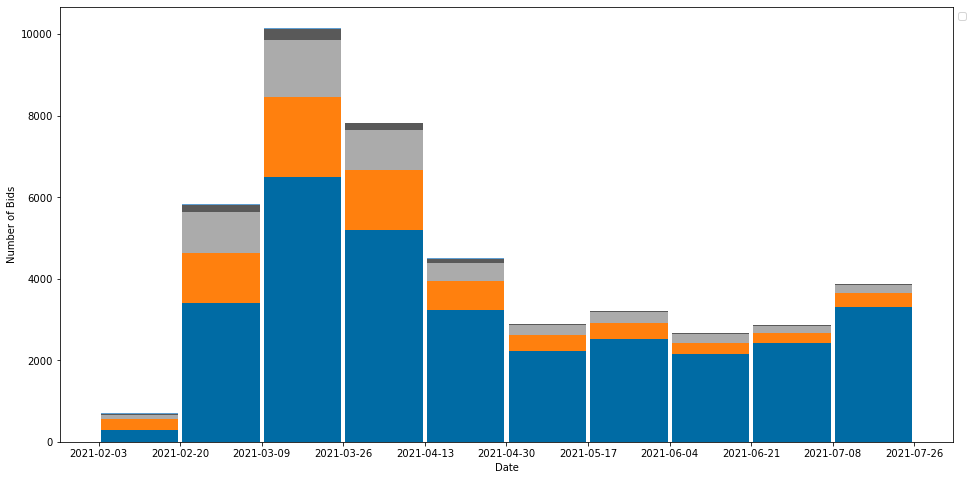

In [22]:
df_bids = df_transactions[df_transactions['event'] == 'Bid']
fig = plt.figure(figsize=(16,8))
plt.style.use('tableau-colorblind10')
g1 = df_bids[df_bids['amount'] < 1]['date'].apply(lambda date_time: date_time.date())
g2 = df_bids[(df_bids['amount'] >= 1) & (df_bids['amount'] < 2)]['date'].apply(lambda date_time: date_time.date())
g3 = df_bids[(df_bids['amount'] >= 2) & (df_bids['amount'] < 10)]['date'].apply(lambda date_time: date_time.date())
g4 = df_bids[(df_bids['amount'] >= 10) & (df_bids['amount'] < 100)]['date'].apply(lambda date_time: date_time.date())
g5 = df_bids[df_bids['amount'] >= 100]['date'].apply(lambda date_time: date_time.date())

n, bins, patches = plt.hist([g1, g2, g3, g4, g5], bins=10, stacked=True, rwidth=0.95)
plt.xlabel('Date')
plt.ylabel('Number of Bids')
plt.xticks(bins)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()

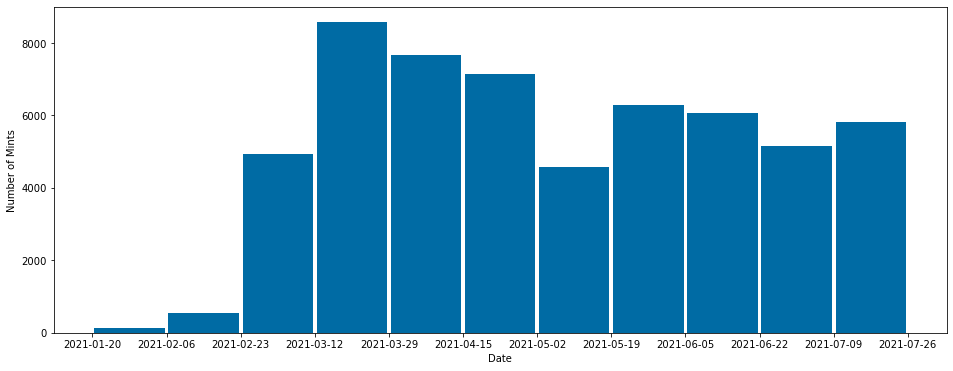

In [23]:
df_mints = df_transactions[df_transactions['event'] == 'Minted']
fig = plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(df_mints['date'].apply(lambda date_time: date_time.date()), rwidth=0.95, bins=11)
plt.xticks(bins)
plt.xlabel('Date')
plt.ylabel('Number of Mints')
plt.show()

In [24]:
list_mint_counts = [0]*12

for index, row in df_mints.iterrows():
    list_mint_counts[row['date'].month -1] += 1
list_mint_counts

[55, 1687, 13610, 13182, 9877, 10260, 8278, 0, 0, 0, 0, 0]

In [25]:
list_bid_counts = [0]*12

for index, row in df_bids.iterrows():
    list_bid_counts[row['date'].month -1] += 1
list_bid_counts

[0, 2069, 17049, 9908, 5301, 4899, 5309, 0, 0, 0, 0, 0]

In [26]:
datetime.datetime.strptime("1", "%m").strftime("%b")
month_names = []
for i in range(1,13):
    month_names.append(datetime.datetime.strptime(str(i), "%m").strftime("%b"))

Text(0.5, 1.0, 'Number of Bids, and Minted NFTs on Foundation')

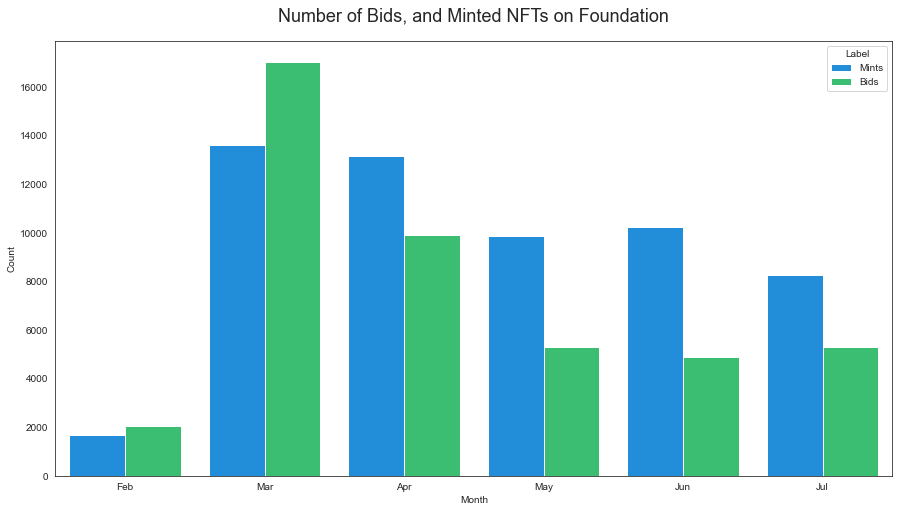

In [27]:
sns.set_palette("terrain")
sns.set_style("white")
fig = plt.figure(figsize=(15,8))
df_activities = pd.DataFrame({"Count": list_mint_counts[1:7] + list_bid_counts[1:7],
                    "Label": ['Mints']*6 + ['Bids']*6,
                  "Month": month_names[1:7] + month_names[1:7]})
s = sns.barplot(x ="Month", y = 'Count', data = df_activities, hue = "Label")
plt.title('Number of Bids, and Minted NFTs on Foundation', size = 18, pad=20)

Text(0.5, 1.0, 'Number of NFTs Minted on Foundation')

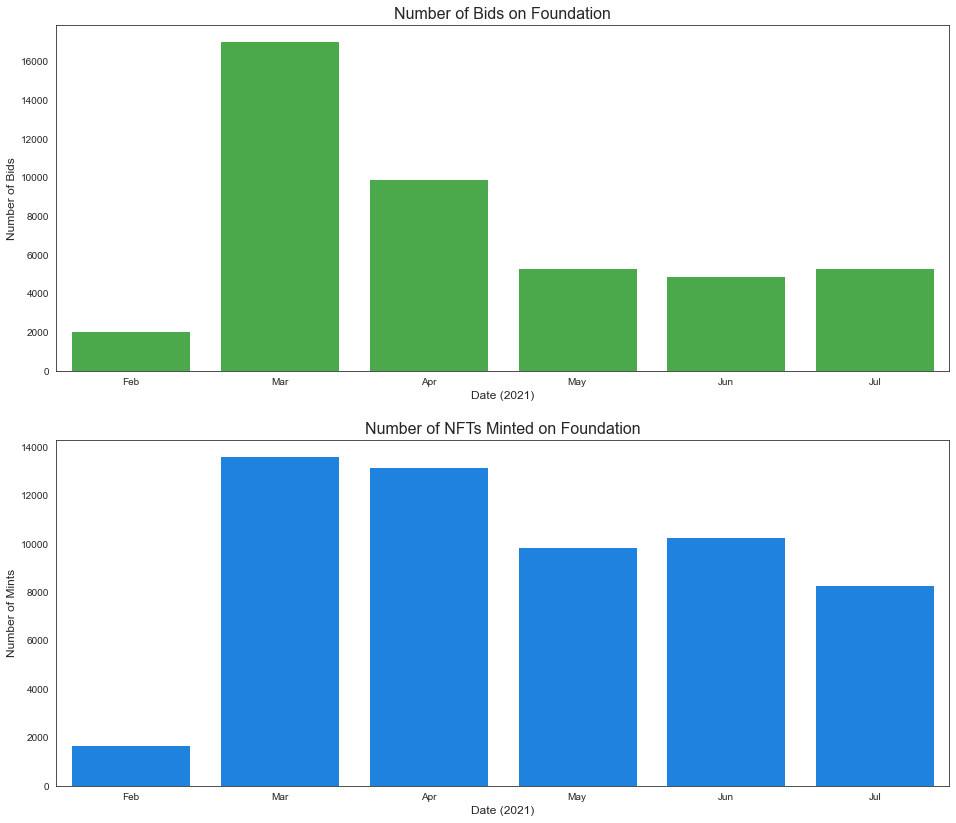

In [28]:
fig, ax = plt.subplots(2,1, figsize=(16,14))
sns.barplot(ax=ax[0], x=month_names[1:7], y= list_bid_counts[1:7], color= "#3CB83C")
ax[0].set_xlabel('Date (2021)', size = 12)
ax[0].set_ylabel('Number of Bids', size = 12)

ax[0].set_title('Number of Bids on Foundation', size=16)


sns.barplot(ax=ax[1], x=month_names[1:7], y= list_mint_counts[1:7], color= "#0083FF")
ax[1].set_xlabel('Date (2021)', size = 12)
ax[1].set_ylabel('Number of Mints', size = 12)
ax[1].set_title('Number of NFTs Minted on Foundation', size = 16)

C:\Users\IHC\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


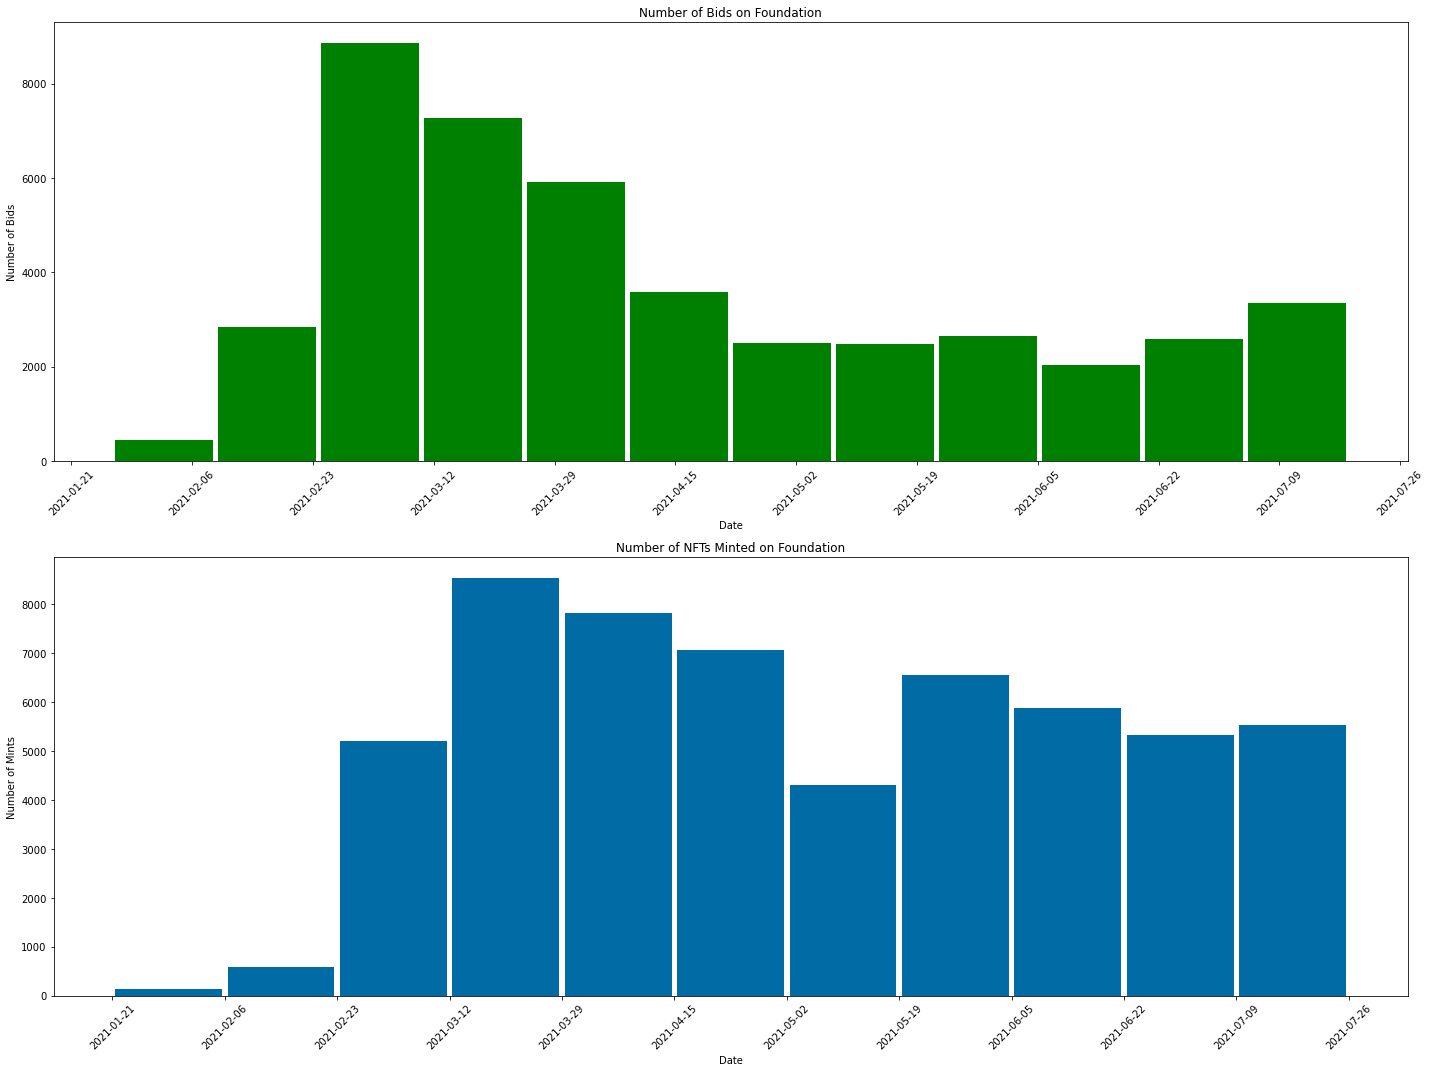

In [32]:
fig, ax = plt.subplots(2,1, figsize=(20,15))
# fig.siz
ax[0].hist(df_bids['date'].apply(lambda date_time: date_time.date()), rwidth=0.95, bins=12, color='g',align='left')

ax[0].set_xticks(bins)
# ax[0].set_xticklabels(ax[0].get_xticklabels(minor=False),rotation=45)
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of Bids')
# ax[0].xaxis.set_major_locator(plt.MaxNLocator(15))

ax[0].set_title('Number of Bids on Foundation')


ax[1].hist(df_mints['date'].apply(lambda date_time: date_time.date()), rwidth=0.95, bins=11)
ax[1].set_xticks(bins)
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Number of Mints')
ax[1].set_title('Number of NFTs Minted on Foundation')

for ax_id in [0,1]:
    for tick in ax[ax_id].get_xticklabels():
        tick.set_rotation(45)
        
fig.tight_layout() 
fig.show()

<font size="5"><b>Daily Activity</b></font>

In [36]:
from datetime import timezone
datetime.datetime.fromtimestamp(df_transactions.date[0].replace(tzinfo=timezone.utc).timestamp())
df_mints.date = df_mints.date.apply(lambda date: date.tz_localize('iran').astimezone(pytz.utc))
df_bids.date = df_bids.date.apply(lambda date: date.tz_localize('iran').astimezone(pytz.utc))
df_transactions.date[1].tz_localize('iran').astimezone(pytz.utc)

Timestamp('2021-07-19 10:10:55+0000', tz='UTC')

In [84]:
def plot_hour_heatmap(df, color, ylabel, title):
    
    hours = [0] * 24
    for index, row in df.iterrows():
        hours[row['date'].hour - 1] += 1

#     fig = plt.figure(figsize=(24,1.5))
    sns.set(font_scale=1.4)
    ax = sns.heatmap([hours], linewidth=0.5, cmap= color, annot=True, fmt=".0f",
                    yticklabels=False)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Time of Day")
    ax.set_title(title)
    ax.tick_params(left=False)
    return ax


C:\Users\IHC\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


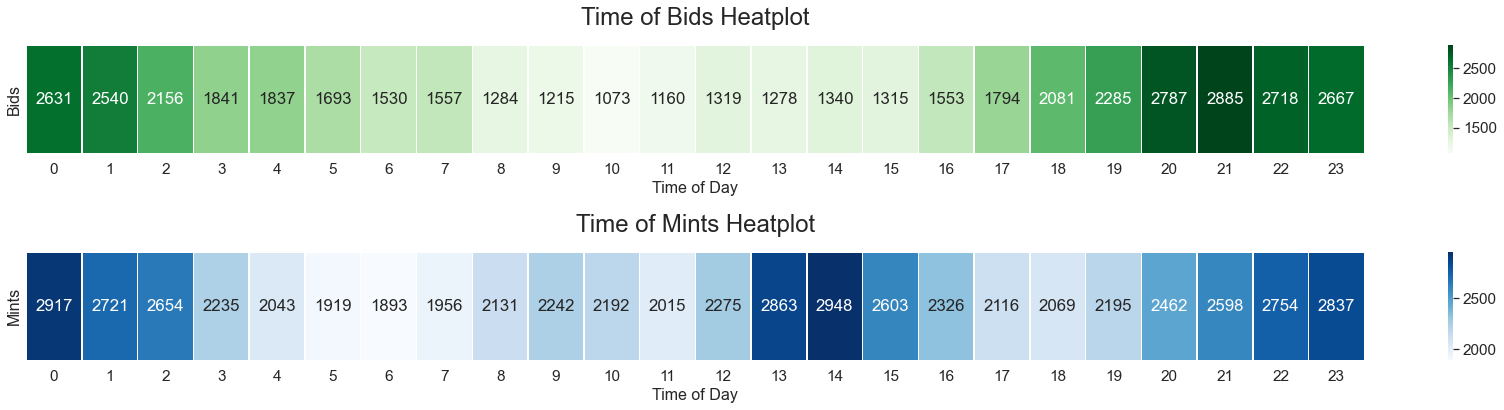

In [48]:
fig, ax = plt.subplots(2,1,figsize=(24,6))

df = df_bids
color = "Greens"
ylabel = "Bids"
title = "Time of Bids Heatplot"

hours = [0] * 24
for index, row in df.iterrows():
    hours[row['date'].hour - 1] += 1

sns.set(font_scale=1.4)
sns.heatmap([hours], linewidth=0.5, cmap= color, annot=True, fmt=".0f",
                yticklabels=False,ax=ax[0])
ax[0].set_ylabel(ylabel, size=16)
ax[0].set_xlabel("Time of Day", size=16)
ax[0].set_title(title, size=24, pad= 20)
ax[0].tick_params(left=False)

df = df_mints
color = "Blues"
ylabel = "Mints"
title = "Time of Mints Heatplot"

hours = [0] * 24
for index, row in df.iterrows():
    hours[row['date'].hour - 1] += 1

sns.set(font_scale=1.4)
sns.heatmap([hours], linewidth=0.5, cmap= color, annot=True, fmt=".0f",
                yticklabels=False,ax=ax[1])
ax[1].set_ylabel(ylabel, size=16)
ax[1].set_xlabel("Time of Day", size=16)
ax[1].set_title(title ,size=24, pad= 20)
ax[1].tick_params(left=False)

fig.tight_layout()
fig.show()


<font size="5"><b>Second Sellers</b></font>

In [39]:
df_transactions.event.unique()

array(['Minted', 'Transferred', 'Listed', 'Bid', 'Sold', 'Settled',
       'Unlisted', 'PriceChanged', 'CreatorMigrated', 'SellerMigrated',
       'OwnerMigrated', 'CreatorPaymentAddressMigrated'], dtype=object)

In [40]:
def calculate_second_sellers_list_price(df_second_sellers):
    df_second_sellers['listed_prices'] = ""
    df_second_sellers['settled_prices'] = ""
    
    list_prices = []
    for row_index, row in df_second_sellers.iterrows():
        row_prices = {}
        listed_count = 0
        setteled_count = 0
        
        row_prices['art_name'] = row['name']
        for index, bid in enumerate(row['history']):
            if bid['event'] == 'Listed':
                if setteled_count == 0:
                    row_prices['first_auction_list_price'] = bid['amount']
                elif setteled_count == 1:
                    row_prices['second_auction_list_price'] = bid['amount']
                    
            elif bid['event'] == 'Settled':
                if setteled_count == 0:
                    row_prices['first_auction_settle_price'] = row['history'][index-1]['amount']
                elif setteled_count == 1:
                    row_prices['second_auction_settle_price'] = row['history'][index-1]['amount']
                setteled_count +=1
            
        
        list_prices.append(row_prices)
    return(list_prices)
    
df_second_sellers = df_nft[df_nft['auctions_started'] == 2]
df_second_sellers = df_second_sellers.reindex(
    columns = df_second_sellers.columns.tolist() + ['first_auction_list_price','second_auction_list_price',
                                                   'first_auction_settle_price','second_auction_settle_price'])
df_second_sellers.reset_index(inplace=True)
df_list_and_settled_prices = pd.DataFrame.from_dict(calculate_second_sellers_list_price(df_second_sellers))
df_list_and_settled_prices['second_list_multiplier'] = (df_list_and_settled_prices['second_auction_list_price']-df_list_and_settled_prices['first_auction_settle_price'])/df_list_and_settled_prices['first_auction_settle_price'] *100


In [131]:
df_list_and_settled_prices

,art_name,first_auction_list_price,first_auction_settle_price,second_auction_list_price,second_auction_settle_price,second_list_multiplier
0,NEW_GODS_,0.500,0.5000,0.600,NaN,20.000000
1,Meditation I,0.250,0.2500,1.000,NaN,300.000000
2,Colorful flower,0.250,0.3800,0.500,NaN,31.578947
3,Pastel Dreams 4,0.250,0.2500,0.350,NaN,40.000000
4,The Witness,0.333,0.4000,0.444,NaN,11.000000
...,...,...,...,...,...,...
2908,Time lost,1.800,1.8000,4.000,NaN,122.222222
2909,Nefertiti & Chill,0.333,0.3330,3.330,NaN,900.000000
2910,SIDETRIP : EXPERIMENTAL : THE TRAIN,1.000,1.7601,3.000,NaN,70.444861
2911,Relaxing Rock,0.190,0.2100,0.400,NaN,90.476190


Text(0.5, 0, 'Percent')

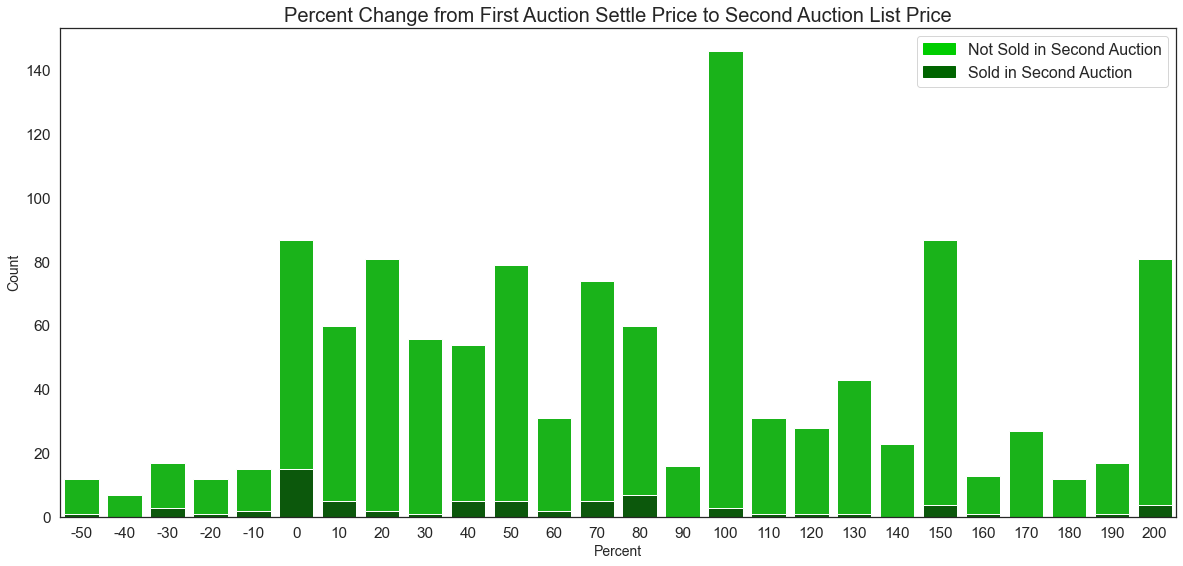

In [94]:
#from -50 to 200
import matplotlib.patches as mpatches



list_multiplier_counts = [0] * 26
list_multiplier_counts_resold = [0] * 26

labels = list(range(-50,210,10))
max(df_list_and_settled_prices['second_list_multiplier'])

for index,row in df_list_and_settled_prices.iterrows():
#     print(row.isnull())
    rounded_multiplier = ((row['second_list_multiplier']+5)//10)*10
    if rounded_multiplier >= -50 and rounded_multiplier <= 200:
#         print(rounded_multiplier)
        list_multiplier_counts[int(rounded_multiplier/10 +6 -1)] += 1
        
        if not row.isnull()['second_auction_settle_price']:
#             print("ss")
            list_multiplier_counts_resold[int(rounded_multiplier/10 +6 -1)] += 1
plt.figure(figsize=(20,9))
sns.barplot(x=labels, y=list_multiplier_counts, color="#00cd00")
sns.barplot(x=labels, y=list_multiplier_counts_resold, color="#006400")

red_patch = mpatches.Patch(color='#00cd00', label='Not Sold in Second Auction')
black_patch = mpatches.Patch(color='#006400', label='Sold in Second Auction')
plt.legend(handles=[red_patch, black_patch], fontsize = 16 )
plt.title("Percent Change from First Auction Settle Price to Second Auction List Price", size = 20)
plt.ylabel("Count", size = 14)
plt.xlabel("Percent", size = 14 )

# plt.legend(labels=['Sold in Second Auction', 'Not Sold in Second Auction'])

[-45.45454545454546, -37.27272727272728, -29.090909090909097, -20.909090909090914, -12.727272727272734, -4.545454545454554, 3.636363636363633, 11.818181818181813, 19.999999999999993, 28.18181818181818, 36.36363636363635, 44.54545454545454, 52.72727272727273, 60.9090909090909, 69.0909090909091, 77.27272727272725, 85.45454545454544, 93.63636363636363, 101.81818181818181, 109.99999999999997, 118.18181818181816, 126.36363636363635, 134.54545454545453, 142.72727272727272, 150.9090909090909, 159.09090909090907, 167.27272727272725, 175.45454545454544, 183.63636363636363, 191.8181818181818, -45.45454545454546, -37.27272727272728, -29.090909090909097, -20.909090909090914, -12.727272727272734, -4.545454545454554, 3.636363636363633, 11.818181818181813, 19.999999999999993, 28.18181818181818, 36.36363636363635, 44.54545454545454, 52.72727272727273, 60.9090909090909, 69.0909090909091, 77.27272727272725, 85.45454545454544, 93.63636363636363, 101.81818181818181, 109.99999999999997, 118.18181818181816,

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x0000020C24427320>>

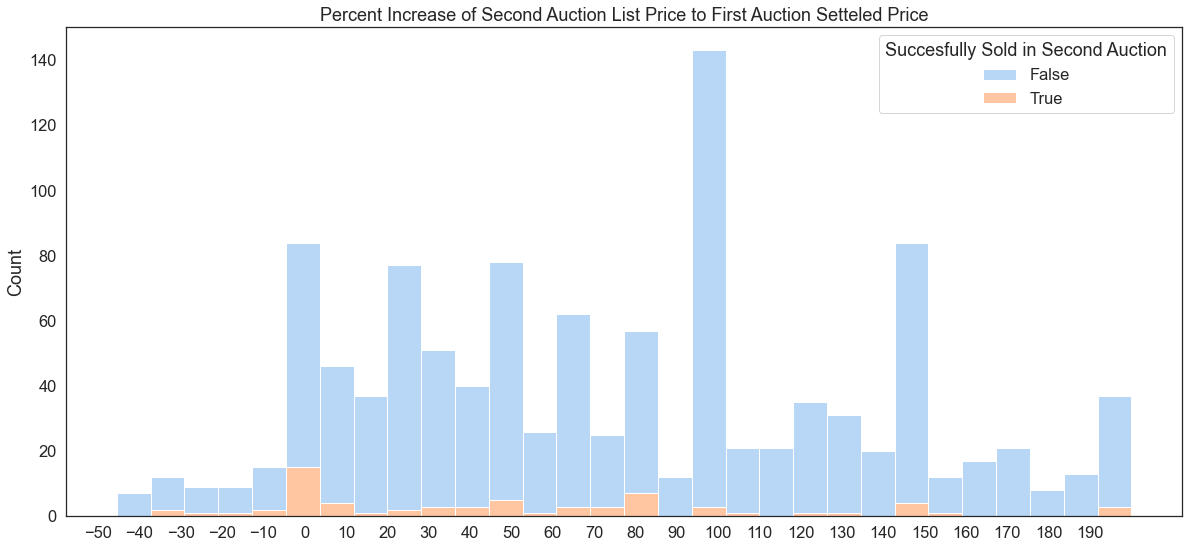

In [53]:
g1 = df_list_and_settled_prices[~df_list_and_settled_prices['second_auction_settle_price'].isnull()]['second_list_multiplier']
g2 = df_list_and_settled_prices[df_list_and_settled_prices['second_auction_settle_price'].isnull()]['second_list_multiplier']

f = plt.figure(figsize=(20,9))
ax = f.add_subplot(1,1,1)
_df1 = pd.DataFrame(g1[g1<200])
_df1 = pd.DataFrame(_df1[_df1>-50])
_df1['Resold'] = True
_df2 = pd.DataFrame(g2[g2<200])
_df2 = pd.DataFrame(_df2[_df2>-50])
_df2['Resold'] = False
sns.set(font_scale=1.5)

sns.set_style("white")
sns.histplot(data=_df1.append(_df2) , ax=ax, stat="count", multiple="stack",
             x="second_list_multiplier", kde=False,
             palette="pastel", hue="Resold",
             element="bars", legend=True, bins=30)
# ax.set_xlabel("Percent Increase of Second List Price to Bought Price")
ax.set_title("Percent Increase of Second Auction List Price to First Auction Setteled Price")
ax.set_ylabel("Count")
ax.set_xlabel(None)
mids = [rect.get_x() + rect.get_width() / 2 for rect in ax.patches]
print([rect.get_x() for rect in ax.patches])
ax.set_xticks(range(-50,200,10))
# ax.xticks(x, [5,10])
# ax.set_xticks(ax.get_xticks()[::10])
# sns.set_style(style="whitegrid")
ax.grid(False)
ax.legend_.set_title("Succesfully Sold in Second Auction")
# axes_style("whitegrid")
# ax.set_facecolor("white")
ax.set
# ax.style.context("seaborn-white")

<font size="5"><b>List Unlist Piechart</b></font>

In [95]:

list_unlister_dicts = []
for index, row in df_nft[df_nft['unlist_count']>0].iterrows():
    unlisted_count = 0
    unlister_dict = {'unlister' : None, 'art_name': None, 'list_date': None , 'unlist_date': None, 'relist_date': None}
    
    for bid in row['history']:
        if bid['event'] == 'Unlisted':
            unlisted_count+=1
            unlister_dict['unlister'] = row['creator']
            unlister_dict['art_name'] = row['name']
            unlister_dict['unlist_date'] = bid['date']
        elif bid['event'] == 'Listed':
            if unlisted_count == 1:
                unlister_dict['relist_date'] = bid['date']
                break
            else:
                unlister_dict['list_date'] = bid['date']
                
    list_unlister_dicts.append(unlister_dict)
unlisters = pd.DataFrame(list_unlister_dicts).dropna()
unlisters['unlist_relist_time_difference'] = unlisters['relist_date'] - unlisters['unlist_date']

([<matplotlib.patches.Wedge at 0x1ad6ceb0ba8>,
 [Text(0.29837268345192214, 1.0587604742195937, 'Less than 1 Hour'),
  Text(-1.099859181283563, 0.017600606417126345, 'Less than 2 Days'),
  Text(-0.7870957448685529, -0.7684271523116669, '2 to 5 Days'),
  Text(-0.04399183876428741, -1.099119974398672, '5 to 20 Days'),
  Text(0.9350571414216498, -0.5793687446491854, 'More than 20 Days')],
 [Text(0.16274873642832113, 0.5775057132106874, '41%'),
  Text(-0.5999231897910343, 0.009600330772978005, '17%'),
  Text(-0.4293249517464834, -0.419142083079091, '8%'),
  Text(-0.02399554841688404, -0.5995199860356392, '16%'),
  Text(0.5100311680481725, -0.31601931526319205, '18%')])

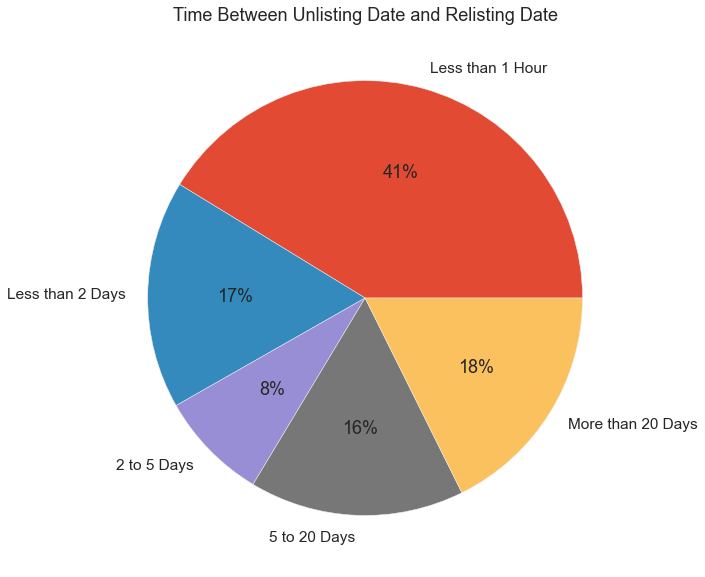

In [98]:
plt.figure(figsize=(10,10))
time_difference_group_counts = [0,0,0,0,0]
labels = ['Less than 1 Hour','Less than 2 Days', '2 to 5 Days', '5 to 20 Days', 'More than 20 Days']
for index, row in unlisters.iterrows():
    if row['unlist_relist_time_difference'] < datetime.timedelta(hours=1):
        time_difference_group_counts[0] += 1
    elif row['unlist_relist_time_difference'] < datetime.timedelta(days=2):
        time_difference_group_counts[1] += 1
    elif row['unlist_relist_time_difference'] < datetime.timedelta(days=5):
        time_difference_group_counts[2] += 1
    elif row['unlist_relist_time_difference'] < datetime.timedelta(days=20):
        time_difference_group_counts[3] += 1
    else:
        time_difference_group_counts[4] += 1
plt.style.use('ggplot')

plt.rcParams.update({'font.size': 18})

plt.title("Time Between Unlisting Date and Relisting Date", size= 18)
plt.pie(time_difference_group_counts, labels=labels, autopct='%1.0f%%')

<font size="5"><b>Transfer</b></font>

([<matplotlib.patches.Wedge at 0x16f731976a0>,
 [Text(0.9310730219801577, 0.5857499703292668, 'Not Sold'),
  Text(-0.3719022607308436, 1.0352239895130366, ' Less than 0.3 Ether'),
  Text(-1.0092691645169938, -0.4374651455318121, 'Between 0.3 and 1 Ether'),
  Text(0.15271569216327466, -1.089347473199939, 'Between 1 and 2 Ethers'),
  Text(0.8183807251073838, -0.7350190397348308, 'Between 2 and 4 Ethers'),
  Text(1.0670435868564994, -0.26724143344252654, 'More than 4 Ethers')],
 [Text(0.5078580119891769, 0.3194999838159637, '18%'),
  Text(-0.2028557785804601, 0.5646676306434745, '25%'),
  Text(-0.5505104533729056, -0.23861735210826113, '27%'),
  Text(0.08329946845269526, -0.5941895308363304, '15%'),
  Text(0.44638948642220927, -0.40091947621899865, '8%'),
  Text(0.5820237746489996, -0.14576805460501446, '8%')])

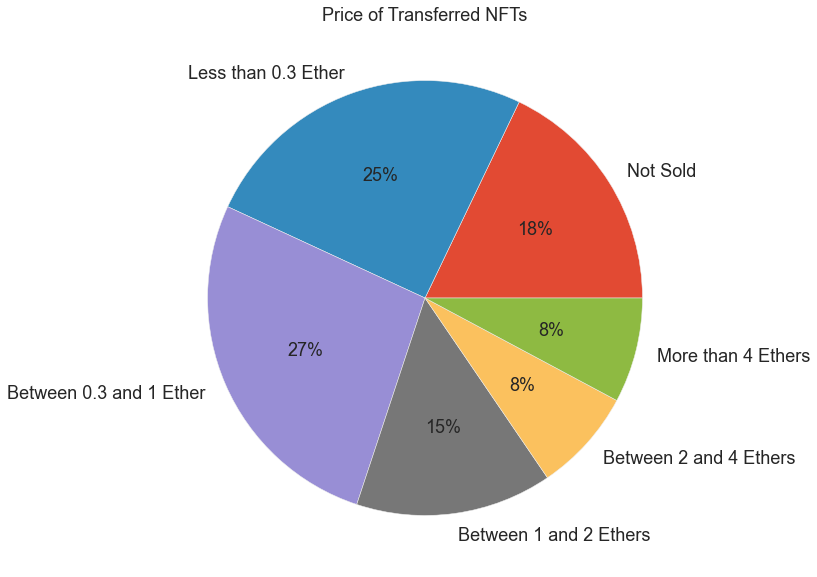

In [42]:
df_transfers = df_nft[df_nft['transfer_count'] > 0]

labels = ['Not Sold',' Less than 0.3 Ether', 'Between 0.3 and 1 Ether', 'Between 1 and 2 Ethers', 'Between 2 and 4 Ethers' , 'More than 4 Ethers']

price_group_counts = [0,0,0,0,0,0]
for index, row in df_transfers.iterrows():
    if pd.isna(row['price']):
        
        price_group_counts[0] += 1
    elif row['price'] < 0.3:
        price_group_counts[1] += 1
    elif row['price'] < 1:
        price_group_counts[2] += 1
    elif row['price'] < 2:
        price_group_counts[3] += 1
    elif row['price'] < 4:
        price_group_counts[4] += 1
    else:
        price_group_counts[5] += 1
plt.figure(figsize=(10,10))
plt.style.use('ggplot')

plt.rcParams.update({'font.size': 18})

plt.title("Price of Transferred NFTs", size = 18)
plt.pie(price_group_counts, labels=labels, autopct='%1.0f%%')

([<matplotlib.patches.Wedge at 0x16f73523340>,
 [Text(0.2769522480176532, 1.0645644425388106, 'Not Sold'),
  Text(-1.0950191096388482, -0.10456170200290538, ' Less than 0.3 Ether'),
  Text(-0.24164660078612282, -1.0731294983964015, 'Between 0.3 and 1 Ether'),
  Text(0.7458369325342991, -0.8085340253000041, 'Between 1 and 2 Ethers'),
  Text(1.0319457510500165, -0.3809041439651417, 'Between 2 and 4 Ethers'),
  Text(1.0946045590445075, -0.10881571264748227, 'More than 4 Ethers')],
 [Text(0.15106486255508356, 0.5806715141120784, '42%'),
  Text(-0.5972831507120989, -0.05703365563794838, '19%'),
  Text(-0.13180723679243062, -0.5853433627616735, '21%'),
  Text(0.4068201450187085, -0.44101855925454764, '10%'),
  Text(0.5628795005727363, -0.2077658967082591, '5%'),
  Text(0.597057032206095, -0.05935402508044487, '3%')])

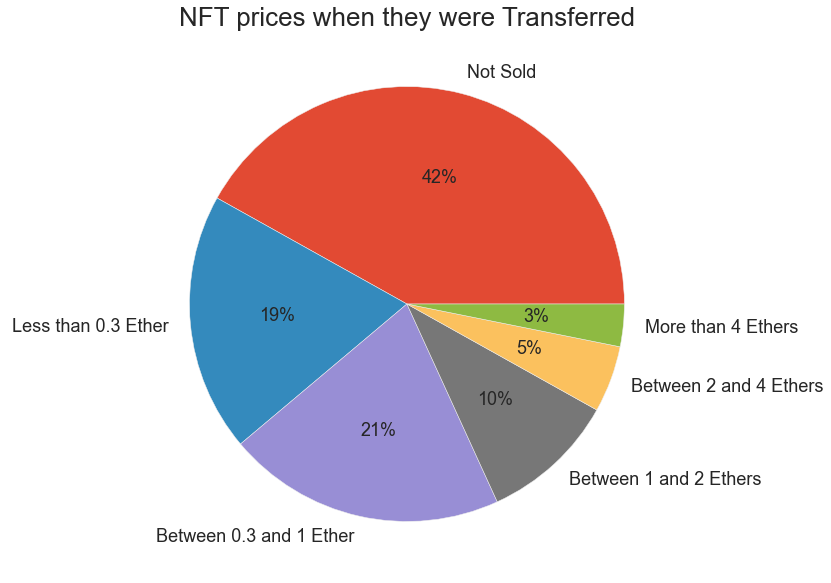

In [43]:
df_transfers = df_nft[df_nft['transfer_count'] > 0]

labels = ['Not Sold',' Less than 0.3 Ether', 'Between 0.3 and 1 Ether', 'Between 1 and 2 Ethers', 'Between 2 and 4 Ethers' , 'More than 4 Ethers']

price_group_counts = [0,0,0,0,0,0]
for index, row in df_transfers.iterrows():
    last_price = None
    for transaction in row['history']:
        if transaction['event'] == 'Bid':
            last_price = transaction['amount']
        elif transaction['event'] == 'Transferred':
            if pd.isna(last_price):
                price_group_counts[0] += 1
            elif last_price < 0.3:
                price_group_counts[1] += 1
            elif last_price < 1:
                price_group_counts[2] += 1
            elif last_price < 2:
                price_group_counts[3] += 1
            elif last_price < 4:
                price_group_counts[4] += 1
            else:
                price_group_counts[5] += 1
                
plt.figure(figsize=(10,10))
plt.style.use('ggplot')

plt.rcParams.update({'font.size': 18})

plt.title("NFT prices when they were Transferred")
plt.pie(price_group_counts, labels=labels, autopct='%1.0f%%')

<font size="5"><b>Transfer Network</b></font>

In [6]:
def calculate_graph_metrics(G):
    connected_components = sorted(nx.connected_components(G.to_undirected()), key=len, reverse=True)
    G0 = G.subgraph(connected_components[0])

    print("Node Number: ", len(G.nodes))
    print("Edge Count", len(G.edges))
    print ("Diameter: ", nx.distance_measures.diameter(G0.to_undirected()))
    print ("Radius: ", nx.distance_measures.radius(G0.to_undirected()))
    
    print("Connected Components: ", len(connected_components))
    
    print("Mean shortest path: ", nx.algorithms.average_shortest_path_length(G0.to_undirected())) #undirected

    print("Transitivaty : ", nx.transitivity(G))
    print("Transitivaty undirected: ", nx.transitivity(G.to_undirected()))

    print("Degree Assortativity :", nx.algorithms.degree_assortativity_coefficient(G))

    print("Avg clustering: ", nx.algorithms.average_clustering(G.to_undirected())) #just for undirected

    print("Density: ", nx.density(G))

    degree_values = np.array(list(dict(G.degree()).values()))
    print("Avg degrees: ",degree_values.mean())
    print("Var degrees: ",degree_values.var())
    print("max degrees:", degree_values.max())

    weights = []
    for edge in G.edges(data=True):
        weights.append(edge[2]['weight'])
    weights = np.array(weights)
    print("Avg weights: ",weights.mean())
    print("Var weights: ",weights.var())
    print("max weights: ", weights.max())

In [7]:
transfer_interaction_g = nx.DiGraph()

for index, row in df_transactions[df_transactions['event'] == 'Transferred'].iterrows():
        if transfer_interaction_g.has_edge(row['actor'], row['recipient']):
                transfer_interaction_g.add_edge(row['actor'], row['recipient'],
                                           weight= transfer_interaction_g.get_edge_data(row['actor'], row['recipient'])['weight'] + 1)
        else:
            transfer_interaction_g.add_edge(row['actor'], row['recipient'], weight = 1)


In [8]:
g_degrees = [s[1] for s in list(transfer_interaction_g.degree()) if s[1] < 15]

In [12]:
from scipy.stats import pareto
import matplotlib.pyplot as plt

pareto.fit(g_degrees)

C:\Users\IHC\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(6.236279839862817, -1.44685596555261, 2.4468559655375755)

In [18]:
b = 6.236279839862817

(0.23122774870485585, -2.3414206331501617e-28, 1.0851962172561778)


C:\Users\IHC\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6178: RuntimeWarning: divide by zero encountered in power
  return a*x**(a-1.0)


(array([1.01522082e+01, 2.54495268e+00, 6.45899054e-01, 2.31861199e-01,
        1.21451104e-01, 1.15930599e-01, 3.31230284e-02, 5.52050473e-02,
        4.41640379e-02, 2.76025237e-02, 2.20820189e-02, 0.00000000e+00,
        0.00000000e+00, 5.52050473e-03]),
 array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
        0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
        0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ]),
 <a list of 14 Patch objects>)

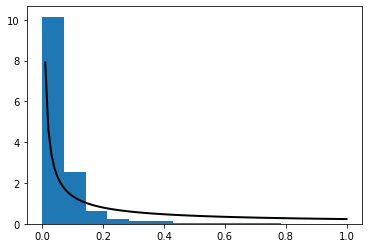

In [53]:
def NormalizeData(data):
    return list((data - np.min(data)) / (np.max(data) - np.min(data)))

from scipy.stats import powerlaw
import matplotlib.pyplot as plt

degrees_normalized  = NormalizeData(np.array(g_degrees))
print(powerlaw.fit(degrees_normalized))


fig, ax = plt.subplots(1, 1)
x = np.linspace(0,
                1, 100)
# r = pareto.rvs(6.236279839862817, size=1000)
rv = powerlaw(0.23122774870485585)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.hist(degrees_normalized, density=True, bins=14)
# ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

C:\Users\IHC\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


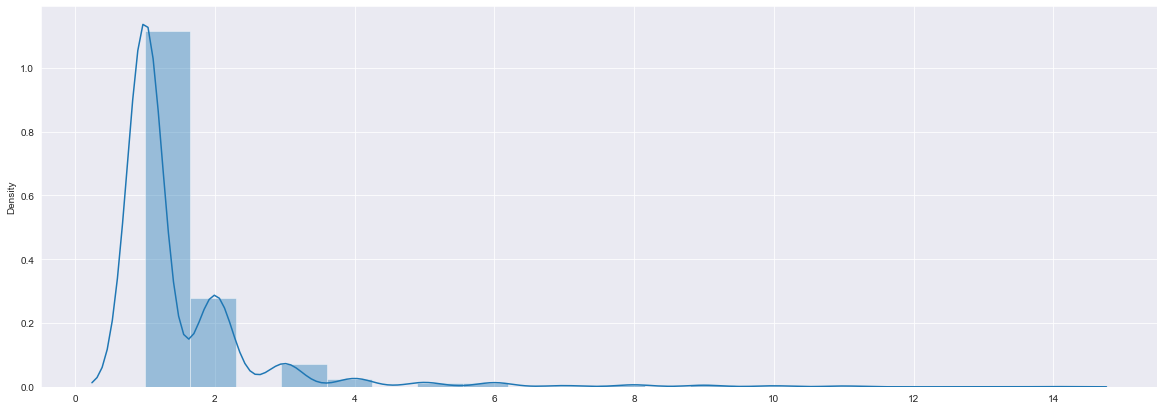

In [37]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.set_style('darkgrid')
sns.distplot(g_degrees,bins=20)

In [10]:
calculate_graph_metrics(transfer_interaction_g)

Node Number:  2546
Edge Count 2013
Diameter:  23
Radius:  12
Connected Components:  751
Mean shortest path:  8.411506137165487
Transitivaty :  0.011846001974333662
Transitivaty undirected:  0.012780269058295964
Degree Assortativity : -0.05144100158713297
Avg clustering:  0.014361117136143606
Density:  0.00031066876351362824
Avg degrees:  1.5813040062843677
Var degrees:  3.0320777968181996
max degrees: 34
Avg weights:  1.6075509190263289
Var weights:  8.976634488837956
max weights:  73


In [27]:
calculate_graph_metrics(list_connected_componenets[0])

Node Number:  788
Edge Count 865
Diameter:  23
Radius:  12
Connected Components:  1
Mean shortest path:  8.411506137165487
Transitivaty :  0.008293838862559242
Transitivaty undirected:  0.00693196405648267
Degree Assortativity : -0.24688184360218143
Avg clustering:  0.011713287938183109
Density:  0.001394810338043976
Avg degrees:  2.1954314720812182
Var degrees:  8.058253240227783
max degrees: 34
Avg weights:  1.6346820809248555
Var weights:  14.28503992782919
max weights:  73


In [28]:
calculate_graph_metrics(list_connected_componenets[1])

Node Number:  26
Edge Count 25
Diameter:  10
Radius:  5
Connected Components:  1
Mean shortest path:  4.621538461538462
Transitivaty :  0
Transitivaty undirected:  0
Degree Assortativity : -0.5291871754156865
Avg clustering:  0.0
Density:  0.038461538461538464
Avg degrees:  1.9230769230769231
Var degrees:  2.378698224852071
max degrees: 8
Avg weights:  1.36
Var weights:  0.6304
max weights:  4


In [12]:

connected_components = sorted(nx.connected_components(transfer_interaction_g.to_undirected()), key=len, reverse=True)
G0 = transfer_interaction_g.subgraph(connected_components[0])
list_connected_componenets = [transfer_interaction_g.subgraph(connected_components[i]) for i in range(10)]

In [39]:
calculate_graph_metrics(G0_un)

Node Number:  788
Edge Count 832
Diameter:  23
Radius:  12
Connected Components:  1
Mean shortest path:  8.411506137165487
Transitivaty :  0.00693196405648267
Transitivaty undirected:  0.00693196405648267
Degree Assortativity : -0.2764857349797625
Avg clustering:  0.011713287938183103
Density:  0.0026831958410464462
Avg degrees:  2.1116751269035534
Var degrees:  7.639812929990466
max degrees: 34
Avg weights:  1.6213942307692308
Var weights:  14.47324420996672
max weights:  73


<font size="5"><b>Mean Shortest Path Length Progression</b></font>

In [65]:

list_mean_shortest_paths = []

for j in tqdm(range(10)):
    selected_nodes = [list(G0.nodes)[0]]
    mean_shortest_paths = []
    G0_un = G0.to_undirected()
    for i in range(len(G0.nodes)):
        new_node_found = False
        random.shuffle(selected_nodes)
        for node in selected_nodes:
            for neighbour in list(G0_un.edges(node)):
                if neighbour[1] not in selected_nodes:
                    selected_nodes.append(neighbour[1])
                    new_node_found = True
                    break
            if new_node_found:
                break

        if not new_node_found:
            break

        if len(selected_nodes)%10 == 0:
            mean_shortest_paths.append(nx.algorithms.average_shortest_path_length(G0_un.subgraph(selected_nodes)))
    
    list_mean_shortest_paths.append(mean_shortest_paths)
mean_shortest_paths    


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  0%|                                                                                          | 0/788 [00:00<?, ?it/s]

  7%|█████▉                                                                          | 59/788 [00:00<00:01, 552.87it/s]

 11%|█████████                                                                       | 89/788 [00:00<00:01, 351.09it/s]

 14%|██████████▋                                                                    | 107/788 [00:00<00:02, 272.71it/s]

 16%|████████████▌                                                                  | 125/788 [00:00<00:03, 170.90it/s]

 18%|██████████████▏                                                                 | 140/788 [00:00<00:06, 97.53it/s]

 19%|███████████████▍                                                                | 152/788 [00:01<00:07, 81.59it/s]

 21%|████████████████▌         

 87%|█████████████████████████████████████████████████████████████████████▉          | 689/788 [01:31<00:47,  2.07it/s]


 89%|██████████████████████████████████████████████████████████████████████▉         | 699/788 [01:36<00:42,  2.09it/s]


 90%|███████████████████████████████████████████████████████████████████████▉        | 709/788 [01:40<00:37,  2.11it/s]


 91%|████████████████████████████████████████████████████████████████████████▉       | 719/788 [01:45<00:33,  2.06it/s]


 93%|██████████████████████████████████████████████████████████████████████████      | 729/788 [01:51<00:29,  2.03it/s]


 94%|███████████████████████████████████████████████████████████████████████████     | 739/788 [01:55<00:23,  2.09it/s]


 95%|████████████████████████████████████████████████████████████████████████████    | 749/788 [02:00<00:18,  2.07it/s]


 96%|█████████████████████████████████████████████████████████████████████████████   | 759/788 [02:05<00:14,  2.05it/s]


 98%|███████████████████

 70%|███████████████████████████████████████████████████████▋                        | 549/788 [01:01<01:10,  3.39it/s]




 71%|████████████████████████████████████████████████████████▊                       | 559/788 [01:05<01:11,  3.20it/s]




 72%|█████████████████████████████████████████████████████████▊                      | 569/788 [01:12<01:37,  2.25it/s]




 73%|██████████████████████████████████████████████████████████▊                     | 579/788 [01:19<01:50,  1.89it/s]




 75%|███████████████████████████████████████████████████████████▊                    | 589/788 [01:25<01:47,  1.85it/s]




 76%|████████████████████████████████████████████████████████████▊                   | 599/788 [01:31<01:45,  1.79it/s]




 77%|█████████████████████████████████████████████████████████████▊                  | 609/788 [01:35<01:32,  1.93it/s]




 79%|██████████████████████████████████████████████████████████████▊                 | 619/788 [01:39<01:22,  2.05it/s]




 80%|███

 47%|█████████████████████████████████████▍                                          | 369/788 [00:19<00:55,  7.62it/s]






 48%|██████████████████████████████████████▍                                         | 379/788 [00:20<00:56,  7.19it/s]






 49%|███████████████████████████████████████▍                                        | 389/788 [00:22<00:58,  6.81it/s]






 51%|████████████████████████████████████████▌                                       | 399/788 [00:24<01:00,  6.40it/s]






 52%|█████████████████████████████████████████▌                                      | 409/788 [00:26<01:02,  6.05it/s]






 53%|██████████████████████████████████████████▌                                     | 419/788 [00:28<01:03,  5.86it/s]






 54%|███████████████████████████████████████████▌                                    | 429/788 [00:30<01:05,  5.50it/s]






 56%|████████████████████████████████████████████▌                                   | 439/788 [00:32<01:06,  5.27it/s

 20%|████████████████▏                                                               | 159/788 [00:01<00:14, 43.61it/s]








 21%|█████████████████▏                                                              | 169/788 [00:02<00:15, 41.19it/s]








 23%|██████████████████▏                                                             | 179/788 [00:02<00:15, 38.89it/s]








 24%|███████████████████▏                                                            | 189/788 [00:02<00:17, 34.24it/s]








 25%|████████████████████▏                                                           | 199/788 [00:03<00:18, 31.98it/s]








 27%|█████████████████████▏                                                          | 209/788 [00:03<00:20, 27.91it/s]








 28%|██████████████████████▏                                                         | 219/788 [00:03<00:21, 25.98it/s]








 29%|███████████████████████▏                                                        | 229/788 [00:04<00

 87%|█████████████████████████████████████████████████████████████████████▉          | 689/788 [01:43<00:40,  2.47it/s]









 89%|██████████████████████████████████████████████████████████████████████▉         | 699/788 [01:47<00:36,  2.41it/s]









 90%|███████████████████████████████████████████████████████████████████████▉        | 709/788 [01:51<00:33,  2.34it/s]









 91%|████████████████████████████████████████████████████████████████████████▉       | 719/788 [01:56<00:29,  2.31it/s]









 93%|██████████████████████████████████████████████████████████████████████████      | 729/788 [02:00<00:25,  2.27it/s]









 94%|███████████████████████████████████████████████████████████████████████████     | 739/788 [02:05<00:21,  2.24it/s]









 95%|████████████████████████████████████████████████████████████████████████████    | 749/788 [02:10<00:17,  2.21it/s]









 96%|█████████████████████████████████████████████████████████████████████████████   | 759/788 [0

[2.088888888888889,
 2.705263157894737,
 3.1586206896551725,
 3.428205128205128,
 3.783673469387755,
 4.166666666666667,
 4.381780538302277,
 4.511392405063291,
 4.693383270911361,
 4.81010101010101,
 4.861050875729775,
 4.957422969187675,
 5.146213476446035,
 5.16546762589928,
 5.298612975391499,
 5.375393081761007,
 5.445945005221024,
 5.548168839230292,
 5.573043720412142,
 5.704170854271357,
 5.795352016404648,
 5.964425072644251,
 6.087450161382191,
 6.150244072524408,
 6.167807228915662,
 6.268547668547669,
 6.357565744182844,
 6.391218637992831,
 6.425438491826751,
 6.457614269788182,
 6.553481574277065,
 6.640987460815047,
 6.68643271621995,
 6.728266527850078,
 6.813360622185837,
 6.851609408851749,
 6.886339998535121,
 6.972406610193029,
 6.96605365499967,
 7.05109022556391,
 7.14353867255054,
 7.242527559949995,
 7.270407112267577,
 7.253706771588321,
 7.133976738431081,
 7.236459221369707,
 7.282529601233952,
 7.327931454418929,
 7.392254079545928,
 7.195799599198397,
 7.20

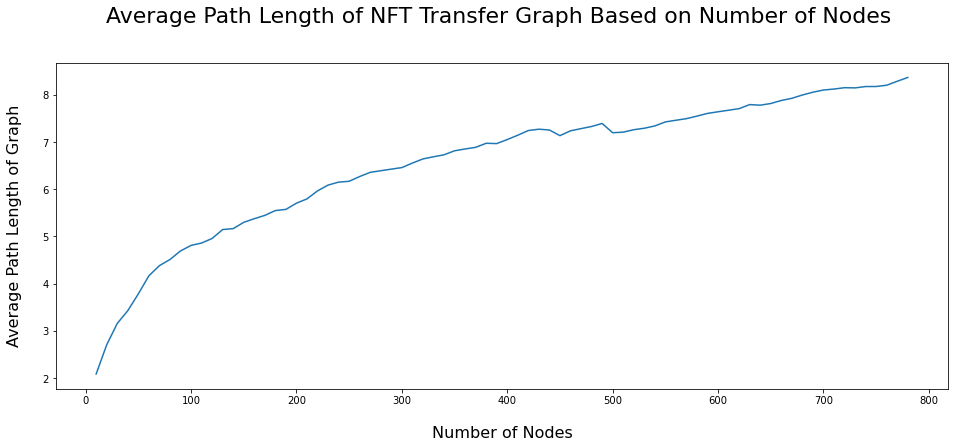

In [100]:
fig = plt.figure(figsize=(16,6))
plt.xlabel('Number of Nodes', fontsize=16,  labelpad= 20)
plt.ylabel('Average Path Length of Graph', fontsize=16, labelpad= 20)
plt.title('Average Path Length of NFT Transfer Graph Based on Number of Nodes ',fontsize=22,pad=40)
plt.plot(range(10,790,10), list_mean_shortest_paths[9])

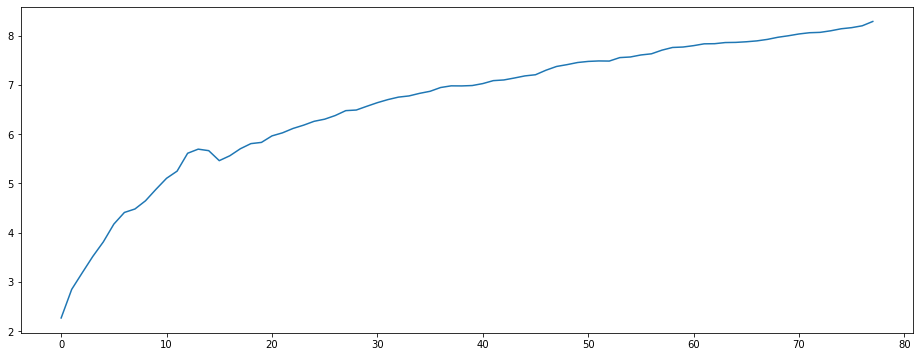

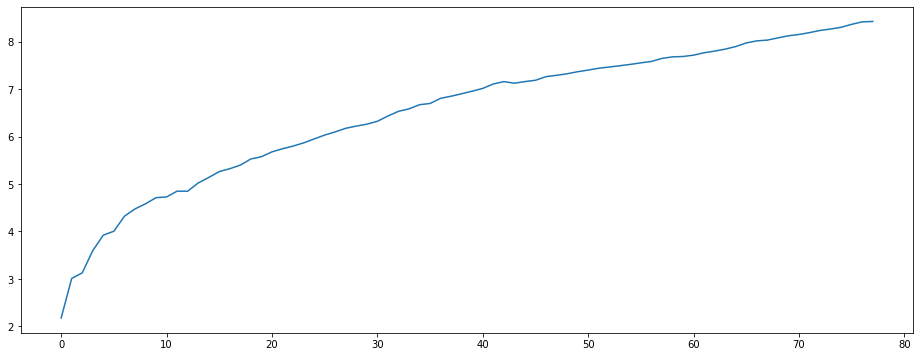

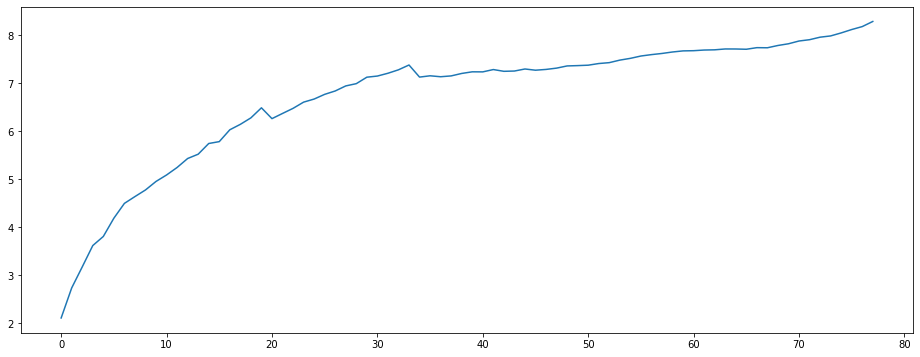

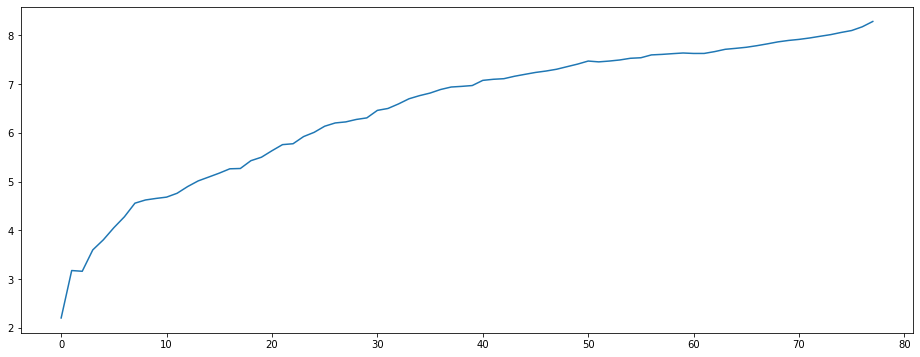

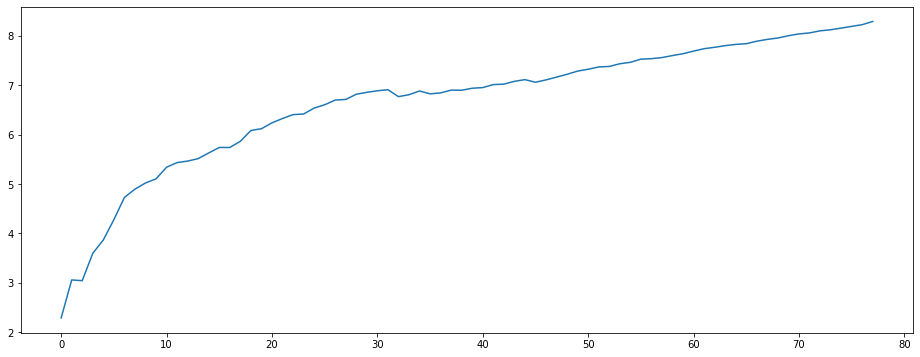

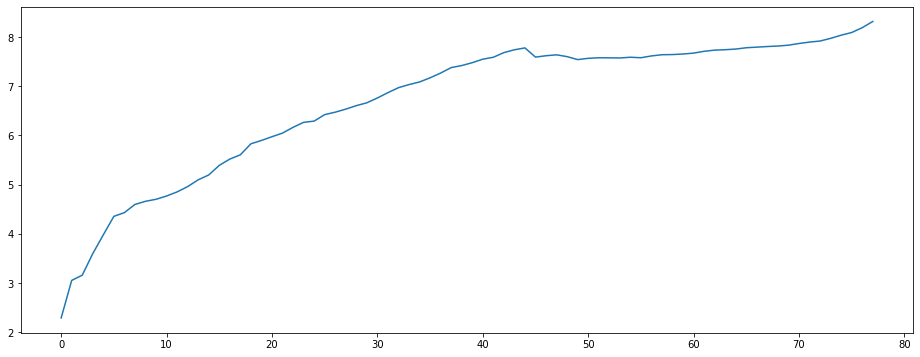

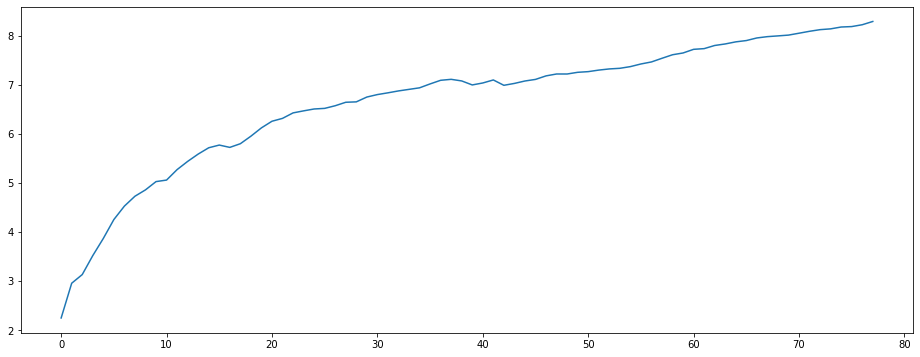

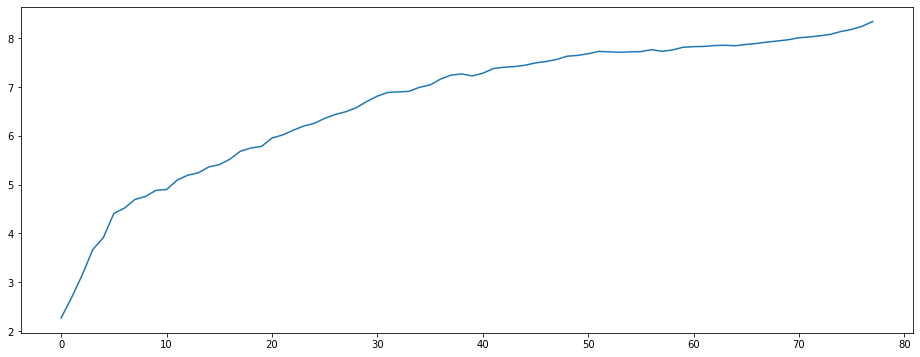

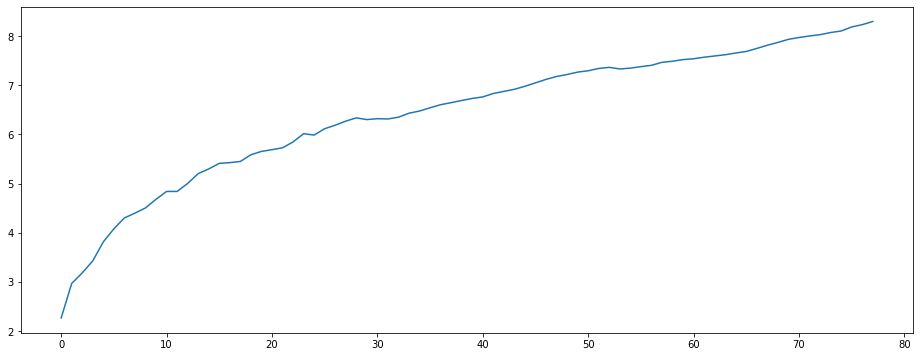

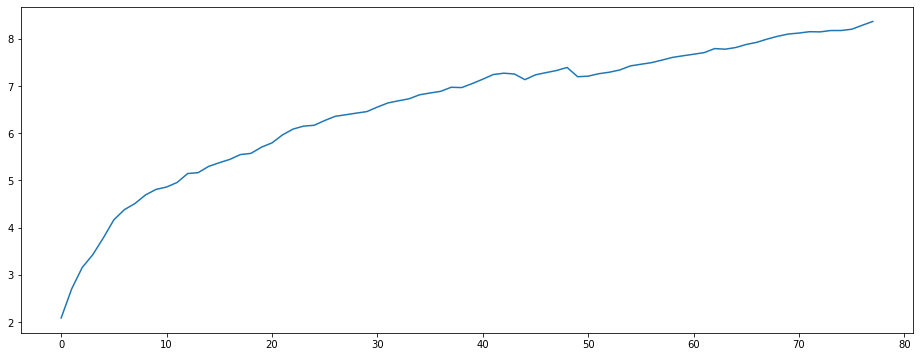

In [70]:
for i in range(10):
    fig = plt.figure(figsize=(16,6))
    plt.plot(list_mean_shortest_paths[i])

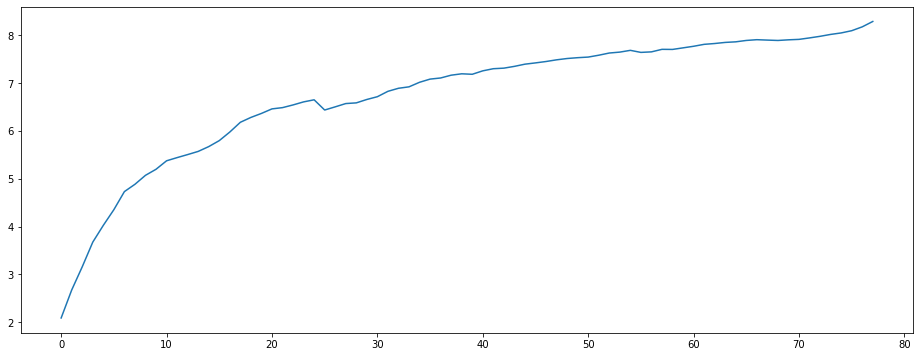

In [64]:
mean_shortest_paths2 = mean_shortest_paths
fig = plt.figure(figsize=(16,6))
plt.plot(mean_shortest_paths)

<font size="5"><b>Clustering Coefficient</b></font>

In [21]:
undir_main_graph = transfer_interaction_g.to_undirected()
rand_graph_count = 1000

clustring_coefs  = []
for i in range(rand_graph_count):
    rand_g = nx.gnm_random_graph(len(undir_main_graph.nodes), len(undir_main_graph.edges), seed=i)
    clustring_coefs.append(nx.algorithms.average_clustering(rand_g))

print(sum(clustring_coefs)/len(clustring_coefs))

0.00025080892529832005


<font size="5"><b>DrawNetwork</b></font>

In [9]:
from pyvis.network import Network

def draw_graph(G):
    pyvis_G = Network(directed=True)
    pyvis_G.from_nx(G)
    for edge in pyvis_G.edges:
        edge['value'] = edge['weight']
    pyvis_G.show("graph.html")

In [14]:
draw_graph(transfer_interaction_g)

In [13]:
draw_graph(list_connected_componenets[0])

In [25]:
def transfer_dataframe(g):
    g.edges(data=True)
    transfer_df = pd.DataFrame(columns=['Node', 'Received', 'Sent'])
    transfer_df['Node'] = list(g.nodes)
    transfer_df.fillna(0, inplace=True)
    for edge in list(g.edges(data=True)):
        transfer_df.loc[transfer_df['Node']== edge[0], 'Sent'] += edge[2]['weight']
        transfer_df.loc[transfer_df['Node']== edge[1], 'Received'] += edge[2]['weight']
    return transfer_df



In [26]:
df_transfer_g0 = transfer_dataframe(list_connected_componenets[0])


In [75]:
dict(nx.degree(list_connected_componenets[0]))

{'0xf7d50f5544a39d684fdc5a35da43acffca8a3a88': 1,
 '0x2854a780ded7acd044ded05aca664bb39731ffdb': 3,
 '0x38640d2d6455c6811ed89fdd68d32f22c9332463': 9,
 '0xe54cb283d9e93906eba5d01cfb8af05f895bcf0e': 2,
 '0xa098702bf910bad1c7aabb623bda47495c4752eb': 1,
 '0x477e1398b71238f0aec7a583323719076e788462': 2,
 '0x20442e0cd067071c40e2e7b4520509c9200692a4': 1,
 '0xf872703f1c8f93fa186869bac83bac5a0c87c3c8': 1,
 '0xaff42573bc515b878513e945e246d0f1b8ff01cc': 1,
 '0x67a42771658c8f1ce95cbd26cf7536034b0aacdb': 1,
 '0x9d45893703d15f1dc297392856b6045a477418e3': 1,
 '0x84178e99f884b745a93658ef2db93265ba269383': 1,
 '0xe4ef7af11e35bf027a4aefc41eb6f732ec72ed9f': 3,
 '0x1351d2cf237dc34eeec11f0e3740f0245f61a54e': 2,
 '0xcfb2e14a86b84522312c7c184b60058dc9caa752': 1,
 '0xfa399b79a8c068bad1001e67e8650046a6aa1758': 2,
 '0x93ba538d15642b703aba9adab81d25d589e116d1': 1,
 '0x7adb96acc3a9863228e6162cb48c2fbb42794a6c': 1,
 '0x2ce780d7c743a57791b835a9d6f998b15bbba5a4': 2,
 '0x54be3a794282c030b15e43ae2bb182e14c409c5e': 1,


<font size="5"><b>Centralities</b></font>

In [29]:
def centralities(g):
    return pd.DataFrame.from_dict({ 'degree' : dict(nx.degree(g)),
                                    'degree_centrality' : nx.degree_centrality(g),
                                   'closeness_centrality' : nx.closeness_centrality(g),
                                  'betweenness_centrality': nx.betweenness_centrality(g)})

centralities(list_connected_componenets[0]).sort_values(by= 'degree_centrality', ascending=False)

,degree,degree_centrality,closeness_centrality,betweenness_centrality
0x716eb921f3b346d2c5749b5380dc740d359055d7,34,0.043202,0.040036,0.000000
0x378bcce7235d53bbc3774bff8559191f06e6818e,26,0.033037,0.034307,0.000058
0x3432b45b9ee95bd5c31a726b936cf2ec719a2153,23,0.029225,0.029441,0.000000
0x000000000000000000000000000000000000dead,20,0.025413,0.057206,0.000000
0x148e78be4529b9894ad36c3df9548bbe7b31fc3c,19,0.024142,0.019944,0.000092
...,...,...,...,...
0x8293fdecb932552d843dce9ba84c5adc0421466e,1,0.001271,0.000000,0.000000
0x55b0fb395acb8091e37186d659efc7ccc8b5af06,1,0.001271,0.010809,0.000000
0xc0049d9fd2c68bdcf3f84d7565dc5e090c6791f2,1,0.001271,0.007650,0.000000
0x1c64531950d295e98dd56bdfd20c088f34fcdc33,1,0.001271,0.000000,0.000000


In [39]:
draw_graph(list_connected_componenets[9])